# Classifying movie reviews. A binary classification 

This notebook contains code from the book Deep Learning with Python by Francois Chollet
Chapter 3.


In [1]:
import keras

In this example, we will learn to classify movie reviews into "positive" reviews and "negative" reviews, just based on the text content of the reviews.

Test set has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


The argument `num_words=10000` means that we will only keep the top 10,000 most frequently occurring words in the training data. Rare words 
will be discarded. This allows us to work with vector data of manageable size.

The variables `train_data` and `test_data` are lists of reviews, each review being a list of word indices (encoding a sequence of words). 
`train_labels` and `test_labels` are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive":

In [3]:
print("train_data:", type(train_data), train_data.shape)
print("train_labels:", type(train_labels), train_labels.shape)
print("test_data:", type(test_data), test_data.shape)
print("test_labels:", type(test_labels), test_labels.shape)

train_data: <class 'numpy.ndarray'> (25000,)
train_labels: <class 'numpy.ndarray'> (25000,)
test_data: <class 'numpy.ndarray'> (25000,)
test_labels: <class 'numpy.ndarray'> (25000,)


In [4]:
print(type(train_data[1]), len(train_data[1]))
print(type(train_data[2]), len(train_data[2]))  
print(type(train_data[3]), len(train_data[3]))
print(type(train_data[24001]), len(train_data[24001]))  

<class 'list'> 189
<class 'list'> 141
<class 'list'> 550
<class 'list'> 158


In [5]:
print(type(train_data))
print(type(train_data[6]))

<class 'numpy.ndarray'>
<class 'list'>


In [6]:
train_data[6]

[1,
 6740,
 365,
 1234,
 5,
 1156,
 354,
 11,
 14,
 5327,
 6638,
 7,
 1016,
 2,
 5940,
 356,
 44,
 4,
 1349,
 500,
 746,
 5,
 200,
 4,
 4132,
 11,
 2,
 9363,
 1117,
 1831,
 7485,
 5,
 4831,
 26,
 6,
 2,
 4183,
 17,
 369,
 37,
 215,
 1345,
 143,
 2,
 5,
 1838,
 8,
 1974,
 15,
 36,
 119,
 257,
 85,
 52,
 486,
 9,
 6,
 2,
 8564,
 63,
 271,
 6,
 196,
 96,
 949,
 4121,
 4,
 2,
 7,
 4,
 2212,
 2436,
 819,
 63,
 47,
 77,
 7175,
 180,
 6,
 227,
 11,
 94,
 2494,
 2,
 13,
 423,
 4,
 168,
 7,
 4,
 22,
 5,
 89,
 665,
 71,
 270,
 56,
 5,
 13,
 197,
 12,
 161,
 5390,
 99,
 76,
 23,
 2,
 7,
 419,
 665,
 40,
 91,
 85,
 108,
 7,
 4,
 2084,
 5,
 4773,
 81,
 55,
 52,
 1901]

We will refer to every small text representing a movie review as a sequnce. Sequences are made of numbers representing different words. Since we restricted ourselves to the top 10,000 most frequent words, no word index will exceed 10,000:

In [7]:
max([max(sequence) for sequence in train_data])

9999

You can quickly decode one of these reviews back to English words:

In [8]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
print(type(word_index), len(word_index))
# print(word_index.keys())
i = 0
for item in word_index.items():
    print(item)
    i = i + 1
    if(i > 4):
        break
        

<class 'dict'> 88584
('fawn', 34701)
('tsukino', 52006)
('nunnery', 52007)
('sonja', 16816)
('vani', 63951)


In [9]:
# We reverse word_index, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
i = 0
for item in reverse_word_index.items():
    print(i,":",item)
    i = i + 1
    if(i > 4):
        break

0 : (34701, 'fawn')
1 : (52006, 'tsukino')
2 : (52007, 'nunnery')
3 : (16816, 'sonja')
4 : (63951, 'vani')


In [10]:
train_data[6]

[1,
 6740,
 365,
 1234,
 5,
 1156,
 354,
 11,
 14,
 5327,
 6638,
 7,
 1016,
 2,
 5940,
 356,
 44,
 4,
 1349,
 500,
 746,
 5,
 200,
 4,
 4132,
 11,
 2,
 9363,
 1117,
 1831,
 7485,
 5,
 4831,
 26,
 6,
 2,
 4183,
 17,
 369,
 37,
 215,
 1345,
 143,
 2,
 5,
 1838,
 8,
 1974,
 15,
 36,
 119,
 257,
 85,
 52,
 486,
 9,
 6,
 2,
 8564,
 63,
 271,
 6,
 196,
 96,
 949,
 4121,
 4,
 2,
 7,
 4,
 2212,
 2436,
 819,
 63,
 47,
 77,
 7175,
 180,
 6,
 227,
 11,
 94,
 2494,
 2,
 13,
 423,
 4,
 168,
 7,
 4,
 22,
 5,
 89,
 665,
 71,
 270,
 56,
 5,
 13,
 197,
 12,
 161,
 5390,
 99,
 76,
 23,
 2,
 7,
 419,
 665,
 40,
 91,
 85,
 108,
 7,
 4,
 2084,
 5,
 4773,
 81,
 55,
 52,
 1901]

In [11]:
# We decode the reviews 
# Please note when word_index was crated the indices were offset by 3
# because indeces: 0, 1 and 2 were reserved indices for "padding", "start of sequence", and "unknown".
# The third review, index 2, now reads in Eglish
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[6]])

In [12]:
decoded_review

"? lavish production values and solid performances in this straightforward adaption of jane ? satirical classic about the marriage game within and between the classes in ? 18th century england northam and paltrow are a ? mixture as friends who must pass through ? and lies to discover that they love each other good humor is a ? virtue which goes a long way towards explaining the ? of the aged source material which has been toned down a bit in its harsh ? i liked the look of the film and how shots were set up and i thought it didn't rely too much on ? of head shots like most other films of the 80s and 90s do very good results"

In [13]:
# print(word_index['padding'], word_index['unknown'])
print(reverse_word_index.get(-2))
print(reverse_word_index.get(6737))
print(reverse_word_index.get(362))

None
lavish
production


In [14]:
# If you doubt the advice about shifting keys by 3, try without the shift:
decoded_review = ' '.join([reverse_word_index.get(i, '?') for i in train_data[6]])

In [15]:
decoded_review

"the boiled full involving to impressive boring this as murdering naschy br villain and suggestion need has of costumes b message to may of props this and concentrates concept issue skeptical to god's he is and unfolds movie women like isn't surely i'm and to toward in here's for from did having because very quality it is and starship really book is both too worked carl of and br of reviewer closer figure really there will originals things is far this make mistakes and was couldn't of few br of you to don't female than place she to was between that nothing dose movies get are and br yes female just its because many br of overly to descent people time very bland"

## Preparing the data


We cannot feed `train_data` and `test_data`, which are the lists of integers, into a neural network. 
We have to turn our lists into tensors. 

- We could pad our lists so that they all have the same length, and turn them into an integer tensor of shape `(samples, word_indices)`.
- We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence 
`[3, 5]` into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then, as the 
first layer in our network we could use a `Dense` layer, capable of handling floating point vector data.

Let's vectorize our data, preparing one-hot-encoded vectors.

In [16]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # e.g. we are placing label 1.0 in position 389, 
        # if a word with has value 389 in word_index dictorionary.
        # this is a bag of words model. We will come back to this later in the course
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
        
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
print("shape of x_train: ", x_train.shape)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
print("shape of x_test: ", x_test.shape)

shape of x_train:  (25000, 10000)
shape of x_test:  (25000, 10000)


Here's what our samples look like now:

In [17]:
x_train.shape

(25000, 10000)

In [18]:
print("len x[0]:", len(x_train[0]),"\n", x_train[0])
print("len x[10000]:", len(x_train[10000]),"\n", x_train[0])

len x[0]: 10000 
 [0. 1. 1. ... 0. 0. 0.]
len x[10000]: 10000 
 [0. 1. 1. ... 0. 0. 0.]


In [19]:
# The following illustrates how we assigned number 1 to every element 
# of a row that corresponds to a word index in x_train. 
illustration = np.zeros((3,5))
print(illustration)
sentences=[[0,4],[2,3],[4,3,4]]
for i in range(0,3):
    illustration[i,sentences[i]] = 1.0
    
print("\n",illustration)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

 [[1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 1.]]


We should also vectorize our labels, which is straightforward:

In [20]:
# Our vectorized labels
import numpy as np
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [21]:
print(y_train[0:8])

[1. 0. 0. 1. 0. 0. 1. 0.]


Now our data is ready to be fed into a neural network.

## Building our network


Our input data is simply vectors, and our labels are scalars (1s and 0s). A type of 
network that performs well on such a problem would be a simple stack of fully-connected (`Dense`) layers with `relu` activations: `Dense(16, 
activation='relu')`

Each such `Dense` layer with a `relu` activation implements 
the following chain of tensor operations:

`output = relu(dot(W, input) + b)`

Having 16 hidden units means that the weight matrix `W` will have shape `(input_dimension, 16)`, i.e. the dot product with `W` will project the 
input data onto a 16-dimensional representation space (and then we would add the bias vector `b` and apply the `relu` operation). In our case the `input` dimension is 10,000. There are 25,000 samples of dimension 10,000 each.

There are two key architecture decisions to make about such stack of dense layers:

* How many layers to use.
* How many "hidden units" to chose for each layer.


Sigmoid "squashes" arbitrary values into the `[0, 1]` interval, thus outputting something that can be interpreted as a probability.

### Keras implementation:

In [22]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/opt/anaconda3/envs/cscie89/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


We need to pick a loss function and an optimizer. 
Since we are facing a binary classification problem and the output of our network is a probability (we end our network with a single-unit layer with a sigmoid activation), is it best to use the `binary_crossentropy` loss. 
It isn't the only viable choice: you could use, for instance, `mean_squared_error`. But crossentropy is usually the best choice when you 
are dealing with models that output probabilities.

Here's the step where we configure our model with the `rmsprop` optimizer and the `binary_crossentropy` loss function. Note that we will 
also monitor accuracy during training.

In [23]:
model.compile(optimizer='rmsprop',   # 'adam' is a popular alternative
              loss='binary_crossentropy',
              metrics=['accuracy'])

We are passing our optimizer, loss function and metrics as strings, which is possible because `rmsprop`, `binary_crossentropy` and 
`accuracy` are packaged as part of Keras. Sometimes you may want to configure the parameters of your optimizer, or pass a custom loss 
function or metric function. This former can be done by passing an optimizer class instance as the `optimizer` argument:

In [24]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

The latter can be done by passing function objects as the `loss` or `metrics` arguments:

In [25]:
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## Validating our approach

In order to verify the accuracy of the model on data that it has never seen before, we will create a "validation set" by 
setting apart 10,000 samples from the original training data:

In [26]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We will now train our model for 20 epochs (20 iterations over all samples in the `x_train` and `y_train` tensors), in mini-batches of 512 
samples. At this same time we will monitor loss and accuracy on the 10,000 samples that we set apart. This is done by passing the 
validation data as the `validation_data` argument:

In [27]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - binary_accuracy: 0.6988 - loss: 0.5972 - val_binary_accuracy: 0.8707 - val_loss: 0.3911
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.8970 - loss: 0.3358 - val_binary_accuracy: 0.8870 - val_loss: 0.3086
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9222 - loss: 0.2451 - val_binary_accuracy: 0.8898 - val_loss: 0.2814
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9389 - loss: 0.1897 - val_binary_accuracy: 0.8877 - val_loss: 0.2786
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9497 - loss: 0.1599 - val_binary_accuracy: 0.8895 - val_loss: 0.2760
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9617 - loss: 0.1330 - val_binary_accuracy: 0.8825 - val_loss: 0.2932
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9696 - loss: 0.1106 - val_binary_accuracy: 0.8841 - val_loss: 0.3061
Epoch 8/20
30/30 ━━

On CPU, this will take less than two seconds per epoch -- training is over in 20 seconds. At the end of every epoch, there is a slight pause 
as the model computes its loss and accuracy on the 10,000 samples of the validation data.

Note that the call to `model.fit()` returns a `History` object. This object has a member `history`, which is a dictionary containing data 
about everything that happened during training. Let's take a look at it:

In [28]:
history_dict = history.history
history_dict.keys()

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

It contains 4 entries: one per metric that was being monitored, during training and during validation. Let's use Matplotlib to plot the 
training and validation loss side by side, as well as the training and validation accuracy:

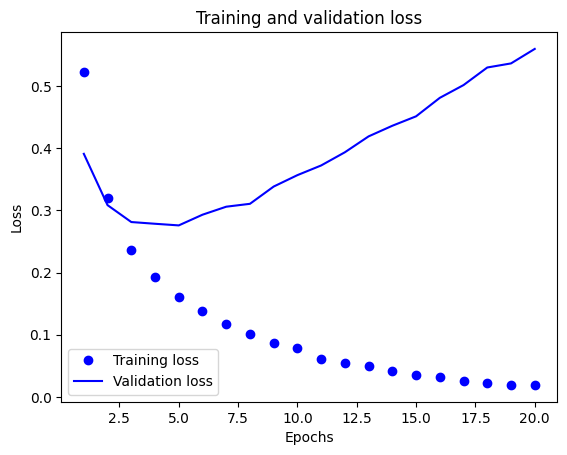

In [29]:
import matplotlib.pyplot as plt

# acc = history.history['acc']
# val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

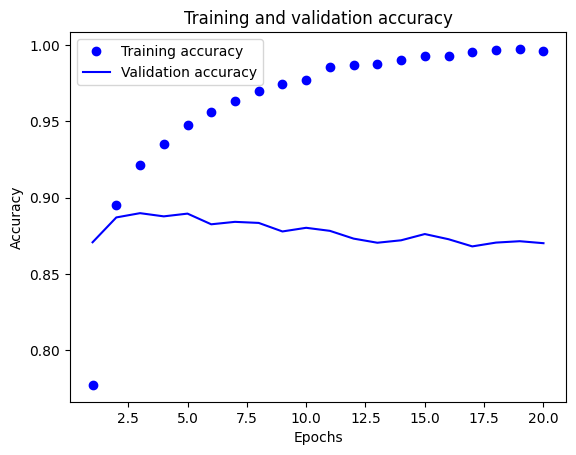

In [30]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
#loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


The dots are the training loss and accuracy, while the solid lines are the validation loss and accuracy. 

As you can see, the training loss decreases with every epoch and the training accuracy increases with every epoch. That's what you would 
expect when running gradient descent optimization -- the quantity you are trying to minimize should get lower with every iteration. But that 
isn't the case for the validation loss and accuracy: they seem to peak at the fourth epoch. This is an example of what we were warning 
against earlier: a model that performs better on the training data isn't necessarily a model that will do better on data it has never seen 
before. In precise terms, what you are seeing is "overfitting": after the second epoch, we are over-optimizing on the training data, and we 
ended up learning representations that are specific to the training data and do not generalize to data outside of the training set.

In this case, to prevent overfitting, we could simply stop training after three epochs. In general, there is a range of techniques you can 
leverage to mitigate overfitting, which we will cover in the next chapter.

Let's train a new network from scratch for four epochs, then evaluate it on our test data:

In [31]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7382 - loss: 0.5554
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9021 - loss: 0.2899
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9261 - loss: 0.2106
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9377 - loss: 0.1747
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.8842 - loss: 0.2871


In [32]:
results

[0.28478971123695374, 0.8853999972343445]

Our fairly naive approach achieves an accuracy of 86%. With state-of-the-art approaches, one should be able to get close to 95%.

## Using a trained network to generate predictions on new data

After having trained a network, you will want to use it in a practical setting. You can generate the likelihood of reviews being positive 
by using the `predict` method:

In [33]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step


array([[0.22664452],
       [0.9999077 ],
       [0.6365089 ],
       ...,
       [0.14293799],
       [0.09025209],
       [0.7627505 ]], dtype=float32)

As you can see, the network is very confident for some samples (0.99 or more, or 0.01 or less) but less confident for others (0.6, 0.4). 


## Conclusions


Here's what you should take away from this example:

* There's usually quite a bit of preprocessing you need to do on your raw data in order to be able to feed it -- as tensors -- into a neural 
network. In the case of sequences of words, they can be encoded as binary vectors -- but there are other encoding options too.
* Stacks of `Dense` layers with `relu` activations can solve a wide range of problems (including sentiment classification), and you will 
likely use them frequently.
* In a binary classification problem (two output classes), your network should end with a `Dense` layer with 1 unit and a `sigmoid` activation, 
i.e. the output of your network should be a scalar between 0 and 1, encoding a probability.
* With such a scalar sigmoid output, on a binary classification problem, the loss function you should use is `binary_crossentropy`.
* The `rmsprop` optimizer is generally a good enough choice of optimizer, whatever your problem. That's one less thing for you to worry 
about.
* As they get better on their training data, neural networks eventually start _overfitting_ and end up obtaining increasingly worse results on data 
never-seen-before. Make sure to always monitor performance on data that is outside of the training set.
